In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from line_gen import gen_line_text

./dataloader/gray_images.pkl loaded


In [2]:
def split_row(start, end, max_cols=4, block_size=30):
    _len = end - start
    if _len < block_size:
        return [[start, end]]
    blocks = []
    try:
        blocks = np.unique(np.random.randint(0, (_len+block_size-1)//block_size, size=max_cols*4))[:max_cols*2]
        if len(blocks)%2==1:
            blocks = blocks[:len(blocks)-1]
        blocks = np.array(sorted(blocks)).reshape(-1,2)*block_size+start
    except:
        blocks = [[start, end]]
    spaces = end - np.max(blocks)
    blocks = blocks + np.clip(int(np.random.uniform()*spaces), 0, spaces)
    
    return blocks
    
    

In [3]:
def draw_text(area):
    h,w = area.shape[:2]
    cv.rectangle(area, (0,0), (w,h), 255, 2)
    return area

In [4]:
def gen_form(form_region, min_row_size=10, max_row_size=20, min_row_sep=1, max_row_sep=30, fix_size=True, dense=False, num_lines=-1):
    if num_lines < 0:
        num_lines = int(1e9)
    print(num_lines)
    h, w = form_region.shape[:2]
#     print(h,w)
    row_size = (max_row_size+min_row_size)/2
    row_scale = row_size/2
    if fix_size:
        row_size = max_row_size

    max_lines = h // (max_row_size + max_row_sep)
    
    possible_line_start = 0
    _count_lines = 0
    while possible_line_start + max_row_size <= h and _count_lines < num_lines:
        print(possible_line_start + max_row_size <= h)
        this_row_size = row_size
        if fix_size:
            this_row_size = row_size
            this_row_sep = max_row_sep
        else:
            this_row_size = int(np.random.uniform(min_row_size, max_row_size))
            this_row_sep = np.random.randint(min_row_sep, max_row_sep)
        
        blocks = split_row(0, w-1, np.random.randint(1, 3), 10)
        for bl in blocks:
            ww = bl[1]-bl[0]
            hh = this_row_size
            tmp, T = gen_line_text(ww, hh)
            reg = form_region[possible_line_start:possible_line_start+hh, bl[0]:bl[1]]
            cond = tmp > 0
            reg[...,0][cond] = T[cond]
            reg[...,1][cond] = T[cond]
            reg[...,2][cond] = T[cond]
            
#             draw_text(form_region[possible_line_start:possible_line_start+this_row_size, bl[0]:bl[1]])
#         print(possible_line_start, this_row_size)
        possible_line_start = possible_line_start+this_row_size+this_row_sep
        _count_lines += 1
        print(possible_line_start + max_row_size ,h)
    
    return form_region
        
            
            
    

In [31]:
form = cv.imread('ST-7-2.jpg')
region = form[740:2000, 70: 1000]
print(form.shape)

(1658, 2336, 3)


1000000000
True
39 918
True
57 918
True
75 918
True
93 918
True
111 918
True
129 918
True
147 918
True
165 918
True
183 918
True
201 918
True
219 918
True
237 918
True
255 918
True
273 918
True
291 918
True
309 918
True
327 918
True
345 918
True
363 918
True
381 918
True
399 918
True
417 918
True
435 918
True
453 918
True
471 918
True
489 918
True
507 918
True
525 918
True
543 918
True
561 918
True
579 918
True
597 918
True
615 918
True
633 918
True
651 918
True
669 918
True
687 918
True
705 918
True
723 918
True
741 918
True
759 918
True
777 918
True
795 918
True
813 918
True
831 918
True
849 918
True
867 918
True
885 918
True
903 918
True
921 918


True

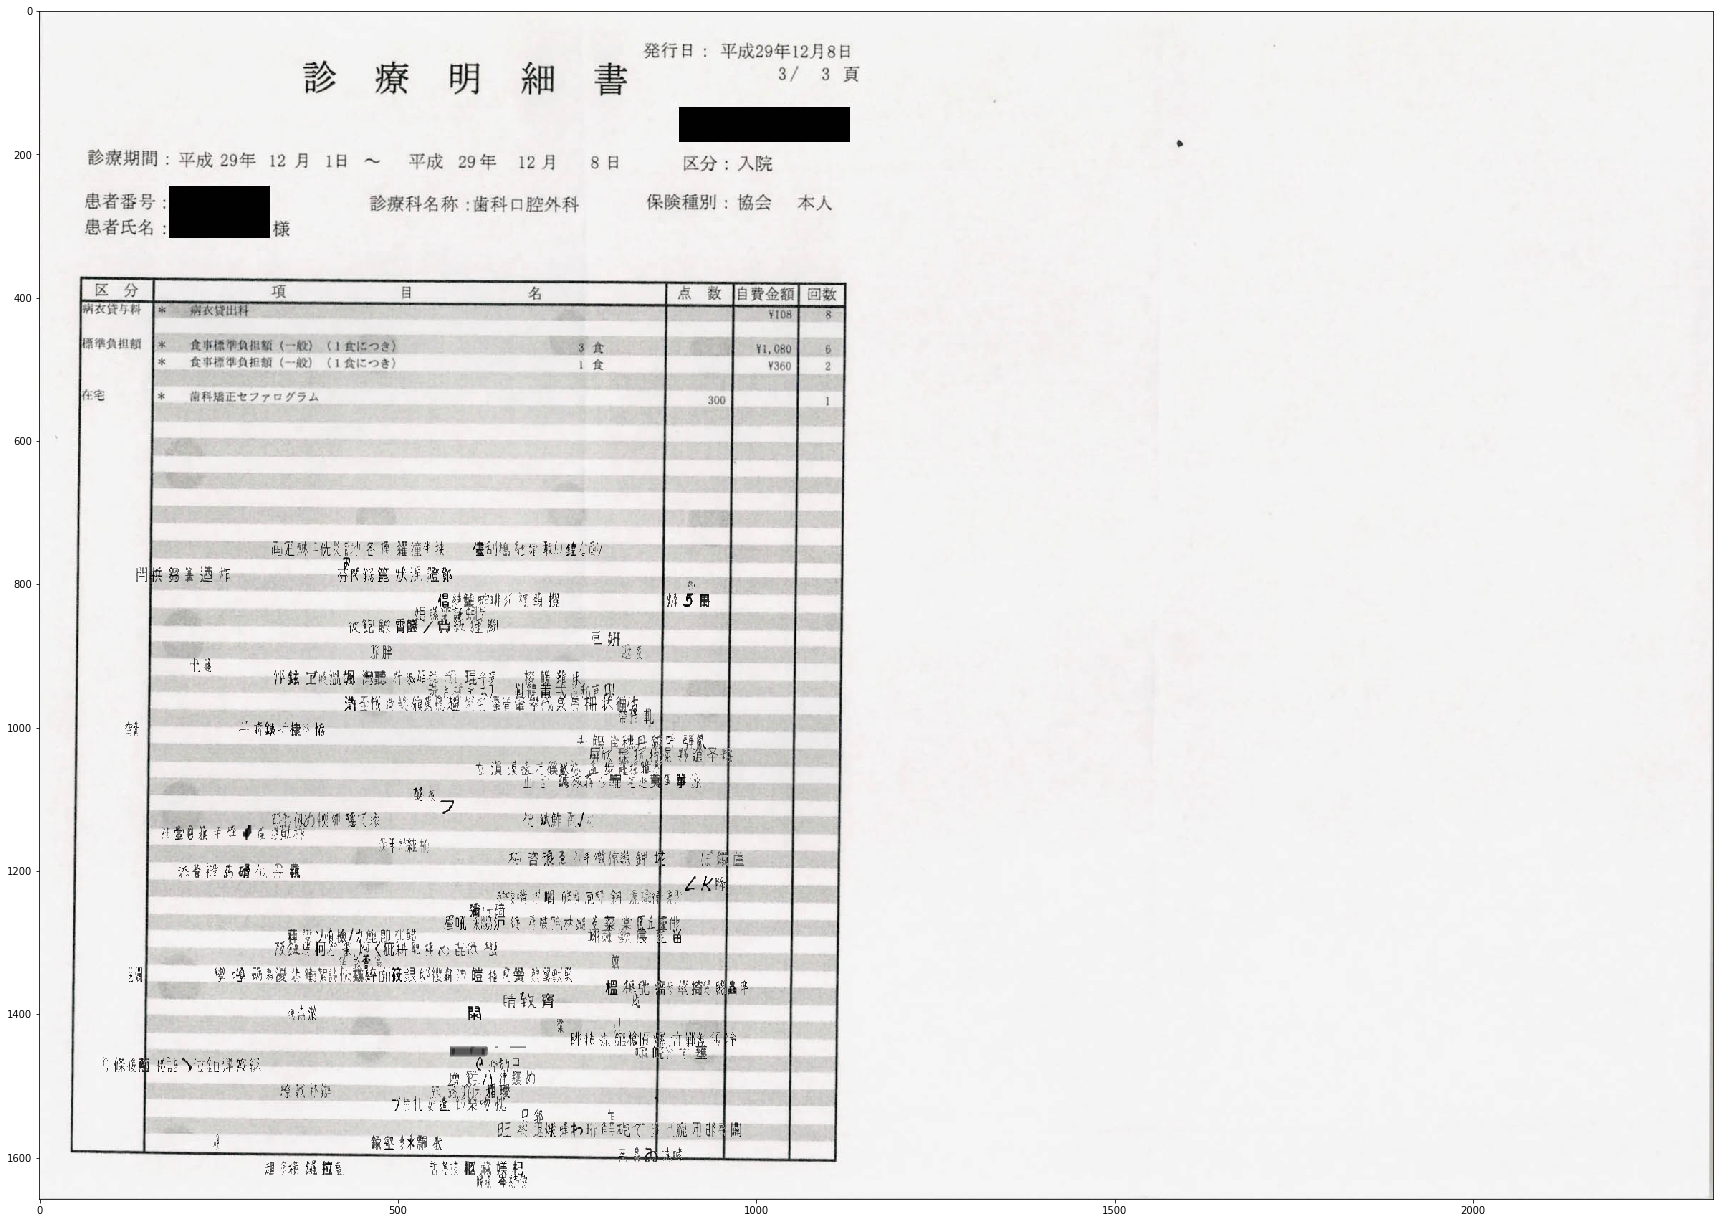

In [32]:
# form = np.zeros((1000,1000,3))
plt.figure(figsize=(30,30))
gen_form(region, 20, 21, fix_size=True, min_row_sep=-5, max_row_sep=-3, num_lines=-1)
plt.imshow(form)
cv.imwrite('hoho.png', form)

In [7]:
plt.imshow(split_row(10, 500, 6, 30)

SyntaxError: unexpected EOF while parsing (<ipython-input-7-63f47723756e>, line 1)

In [ ]:
sorted(np.random.randint(0,10, 10))